In [ ]:
!pip install spectral

     |████████████████████████████████| 212 kB 5.3 MB/s 


In [ ]:
# Bibliotecas
import tifffile as tif
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from spectral import imshow

In [ ]:
img = tif.imread('/content/drive/MyDrive/Curso PDI com Python/L71221071_07120010720_DN.tif')

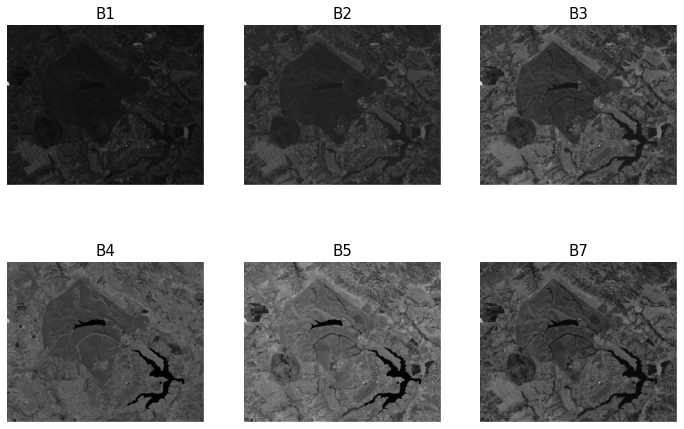

In [ ]:
# Visualização das bandas
bandas = ['B1','B2','B3','B4','B5','B7']

fig, axis = plt.subplots(2,3, figsize=(12,8),sharex='all',sharey='all')
axis = axis.ravel()

for i in range(len(bandas)):
  axis[i].imshow(img[:,:,i], cmap='Greys_r')
  axis[i].set_title(bandas[i], fontsize=15)
  axis[i].axis('off')

In [ ]:
# Transformar o cubo em uma imagem 2D

Matriz = np.zeros((img[:,:,0].size, img.shape[2]))

In [ ]:
# Calcular covariância/ autovalores e autovetores

cov = np.cov(Matriz.transpose())
autoval, autovec = np.linalg.eig(cov)

ordenados = autoval.argsort()[::-1]
autoval = autoval[ordenados]
autovec = autovec[:,ordenados]

In [ ]:
np.set_printoptions(suppress=True)
print("Autovalores: ", autoval)

Autovalores:  [1600.9575333   152.58577046  143.03833451   23.9012298    11.63443667
    1.54434193]


In [ ]:
print("Autovetores: ", autovec)

Autovetores:  [[-0.20813358  0.09902693 -0.44798331 -0.60192746 -0.23912555 -0.57156569]
 [-0.2845092   0.12230848 -0.45198033 -0.2013728  -0.21773012  0.78220939]
 [-0.4663309  -0.08321998 -0.39950945  0.73219916 -0.14872297 -0.24034972]
 [-0.30545896  0.89924918  0.22275456  0.05436788  0.20695072 -0.05139723]
 [-0.57342268 -0.23269772  0.620296   -0.13955444 -0.46077017  0.02205606]
 [-0.48595439 -0.3248252  -0.03209692 -0.19643169  0.78622916  0.02376982]]


In [ ]:
import sympy

M = sympy.Matrix(cov)
Poli = M.charpoly()

Poli

PurePoly(1.0*lambda**6 - 1933.66164665499*lambda**5 + 565765.471973785*lambda**4 - 53932371.7395719*lambda**3 + 1461308964.72009*lambda**2 - 11846751023.6406*lambda + 15005669032.7712, lambda, domain='RR')

In [ ]:
# Cálculo das Componentes
PC = np.matmul(Matriz, autovec)

In [ ]:
# Visualizando scattergramas

matriz = pd.DataFrame(Matriz, columns = bandas)
pcs = pd.DataFrame(PC, columns = bandas)

In [ ]:
bandas_scatter = sns.pairplot(matriz, diag_kind = 'kde', plot_kws={'s':3})
pcs_scatter = sns.pairplot(pcs, diag_kind = 'kde', plot_kws={'s':3})

In [ ]:
# Salvando em disco
bandas_scatter.savefig('bandas.png', dpi=300)
pcs_scatter.savefig('pcs.png', dpi=300)


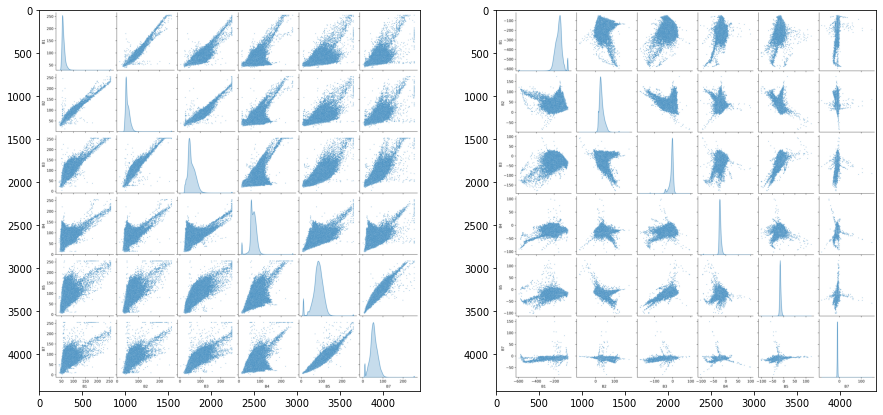

In [ ]:
fig2, ax2 = plt.subplots(1,2, figsize=(15,15))
ax2[0].imshow(mpimg.imread('bandas.png'))
ax2[1].imshow(mpimg.imread('pcs.png'))
plt.show()

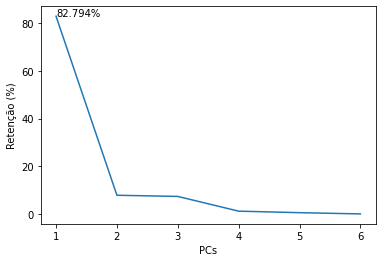

In [ ]:
# Visualizando retenção de dados

ret = autoval/sum(autoval)*100

plt.plot([1,2,3,4,5,6], ret)
plt.annotate(round(ret.max(),3).astype(str)+'%', xy=(1,83))
plt.xlabel('PCs')
plt.ylabel('Retenção (%)')
plt.show()

In [ ]:
# Retornando PCs para 3 dimensões

PC_3D = np.zeros_like(img)

for i in range(6):
  PC_3D[:,:,i] = PC[:,i].reshape(-1,img.shape[1])

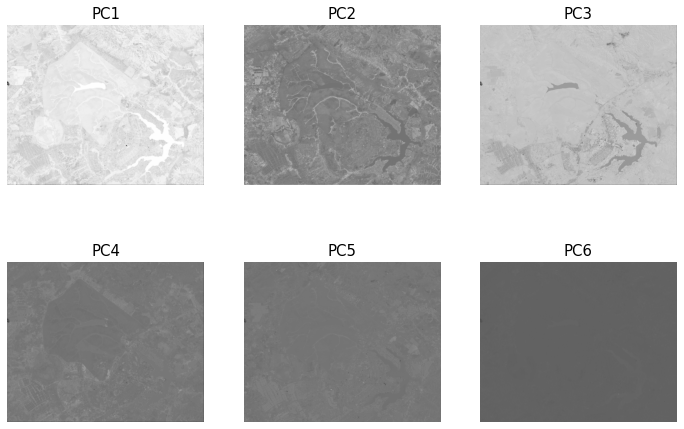

In [ ]:
# Visualizando componentes
componentes =['PC1','PC2','PC3','PC4','PC5','PC6']
fig3, axis3 = plt.subplots(2,3, figsize=(12,8),sharex='all',sharey='all')
axis3 = axis3.ravel()

for i in range(len(bandas)):
  axis3[i].imshow(PC_3D[:,:,i], cmap='Greys_r')
  axis3[i].set_title(componentes[i], fontsize=15)
  axis3[i].axis('off')

ImageView object:
  Display bands       :  (1, 2, 3)
  Interpolation       :  <default>
  RGB data limits     :
    R: [13.0, 61.0]
    G: [-40.0, 8.0]
    B: [-29.0, -12.0]

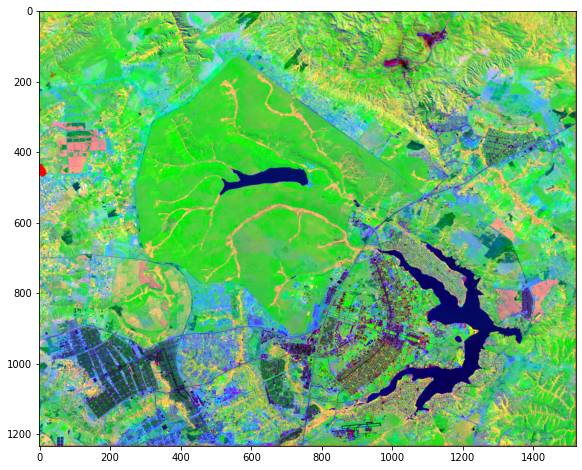

In [ ]:
imshow(PC_3D, (1,2,3), stretch=(0.02,0.98), figsize=(12,8))